<a href="https://www.kaggle.com/code/ikomanggg28/simple-analyzing-mental-health-trends?scriptVersionId=225319336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyzing Mental Health Trends and Predictors Among Students

<div>
  <img src="https://www.bu.edu/sph/files/2022/04/studentmentalhealth.jpeg" style="width: 500px; display: block; margin: auto;">
  <p style="font-size: 14px; font-weight: bold;">
    Source image: <a href="https://www.bu.edu/sph/news/articles/2022/mental-health-of-college-students-is-getting-worse/" target="_blank">Boston University</a>
  </p>
</div>

## Introduction 

### Main Problem

### Learning Objectives

### Understanding Dataset

## Coding

### Import Library dan Dataset

In [1]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# import Dataset
df=pd.read_csv('/kaggle/input/student-depression-dataset/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
print('Data Information :')
df.info()

Data Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-nu

In [4]:
print('Unique values in df :')
df.nunique()

Unique values in df :


id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [5]:
df.drop(axis=1, columns='id', inplace=True)

In [6]:
df.describe(include=['O'])

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


In [7]:
df.describe(exclude=['O'])

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


### Preprocessing

#### Check Missing Value

In [8]:
print('Missing values in df :')
df.isnull().sum()

Missing values in df :


Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
df.dropna(inplace=True)

#### Check Duplicate Value

In [10]:
print('duplicate values in df :', df.duplicated().sum())

duplicate values in df : 0


#### Check Outliers

In [11]:
numeric_columns = df.select_dtypes(['int', 'float']).columns
numeric_columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

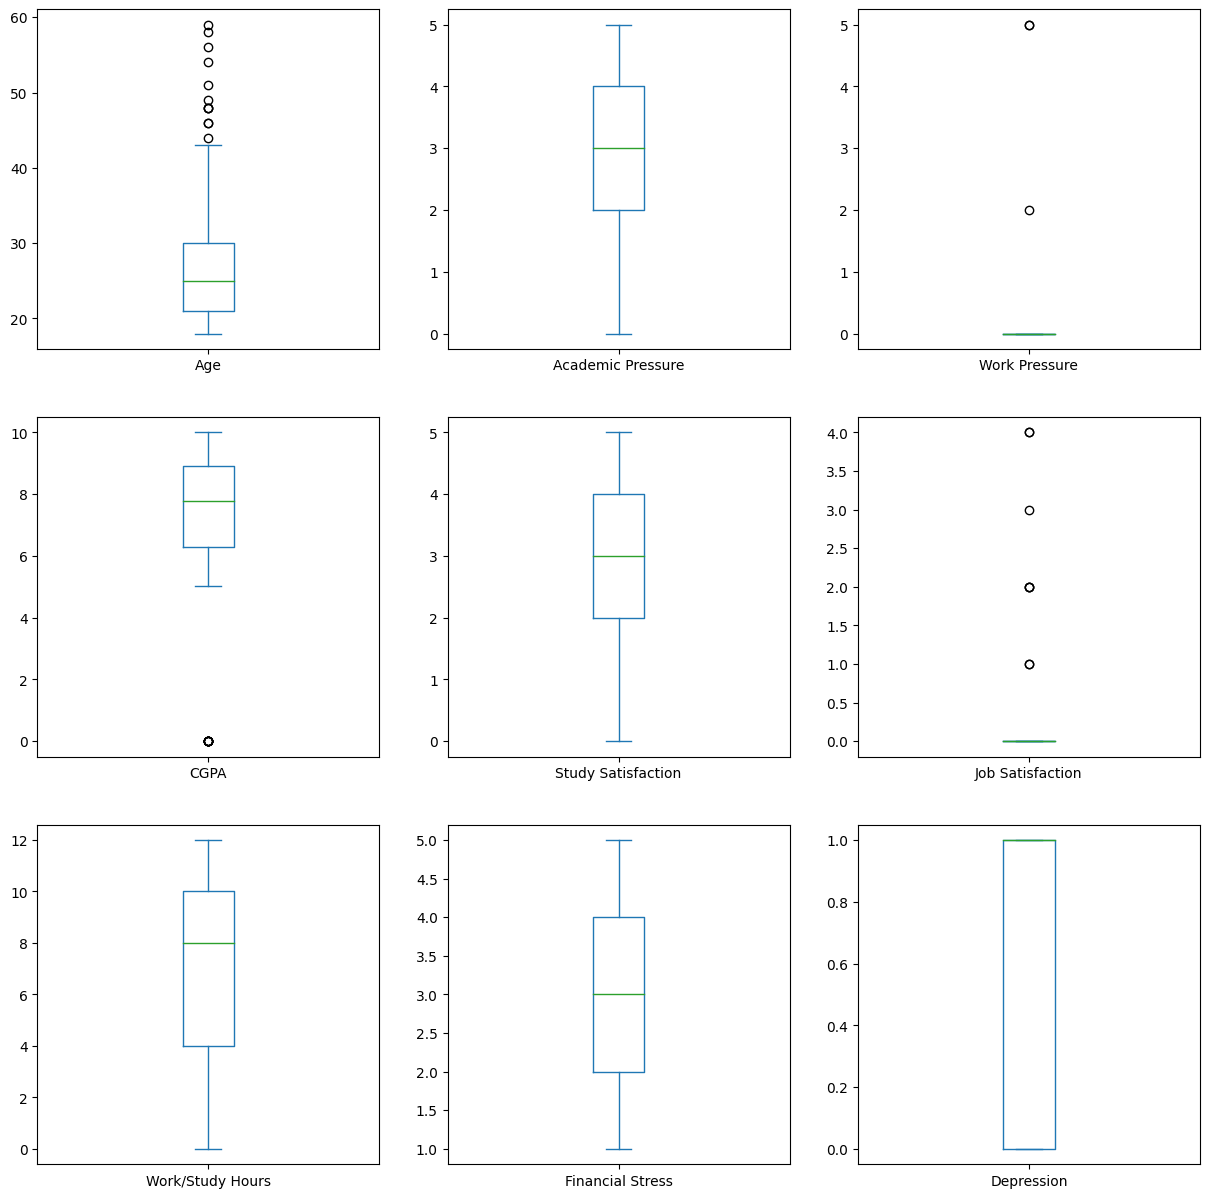

In [12]:
df[numeric_columns].plot(subplots=True, kind='box', layout=(3,3),figsize=(15,15))
plt.show()

#### Check Distribution Data

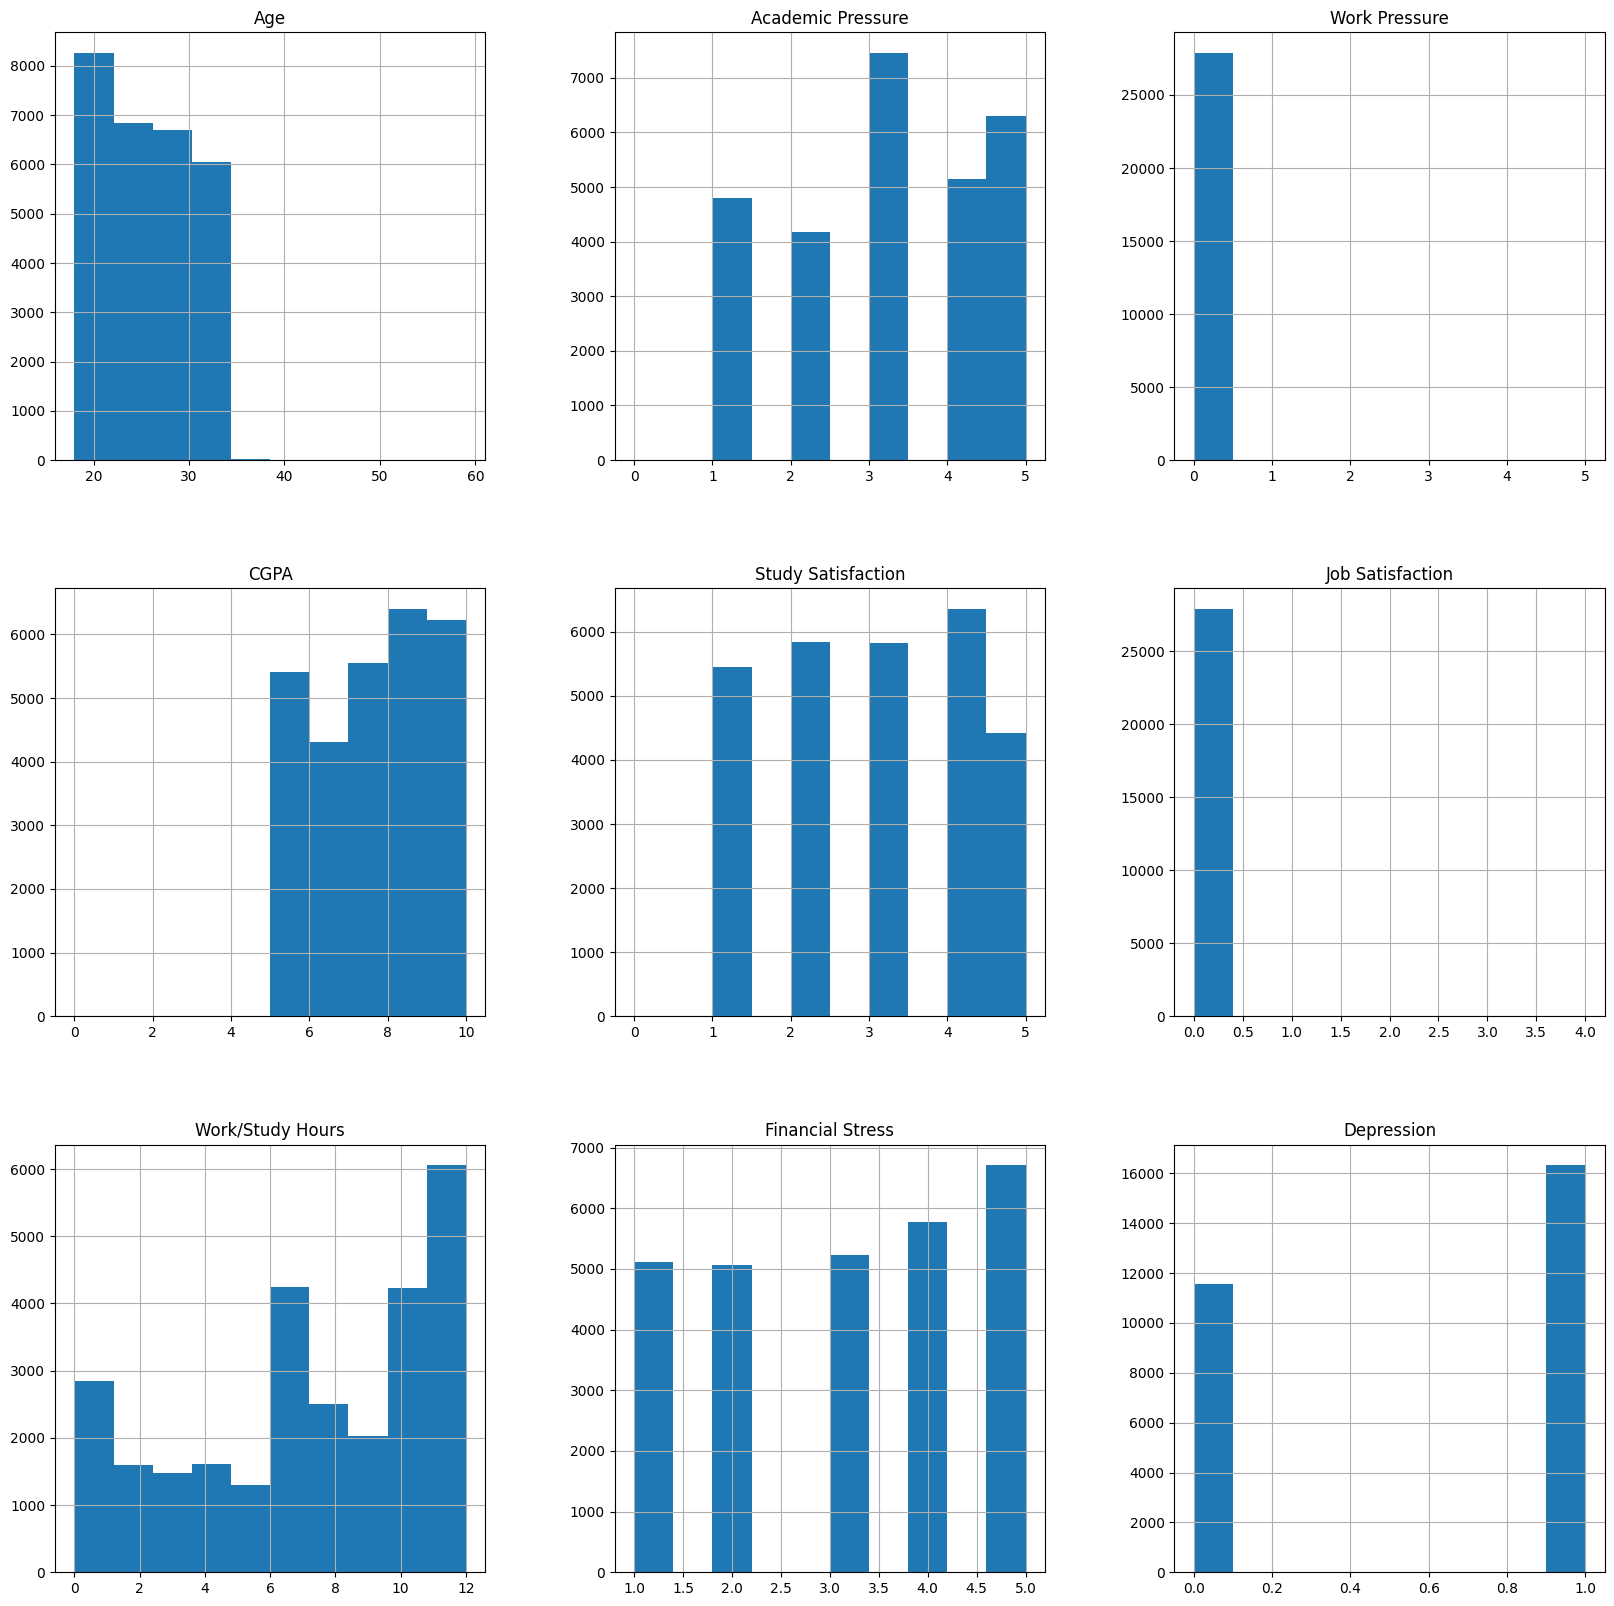

In [13]:
df.hist(figsize=(20,20), layout=(3,3), column = numeric_columns)
plt.show()

### Exploratory Data Analysis

#### Univariate Data

#### Bivariate Data

### Data Preperation

#### Encoding Label

In [14]:
# Encoding Objective
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [15]:
df = df.apply(lambda x: object_to_int(x))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int64  
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  int64  
 3   Profession                             27898 non-null  int64  
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  int64  
 10  Dietary Habits                         27898 non-null  int64  
 11  Degree 

#### Scalling Dataset

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df1 = scaler.fit_transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)
df1.reset_index(drop=True, inplace=True)
df1.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.0,0.888889,0.900000,0.0,1.0,0.0,0.456274,-0.5,0.0,-2.0,-0.333333,-0.727273,0.0,-0.833333,-1.0,0.0,0.0
1,-1.0,-0.111111,-0.700000,0.0,-0.5,0.0,-0.711027,1.0,0.0,-2.0,0.000000,-0.090909,-1.0,-0.833333,-0.5,1.0,-1.0
2,0.0,0.666667,0.666667,0.0,0.0,0.0,-0.281369,1.0,0.0,0.0,-0.333333,-0.545455,-1.0,0.166667,-1.0,1.0,-1.0
3,-1.0,0.333333,0.833333,0.0,0.0,0.0,-0.828897,-0.5,0.0,-1.0,0.000000,-0.363636,0.0,-0.666667,1.0,1.0,0.0
4,-1.0,0.000000,-0.266667,0.0,0.5,0.0,0.136882,0.0,0.0,-2.0,0.000000,0.545455,0.0,-1.166667,-1.0,0.0,-1.0


In [18]:
df1.describe()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,-0.442756,0.091353,0.076470,-0.006237,0.070668,0.000430,-0.043285,-0.028013,0.000681,-0.488494,0.155268,-0.007648,-0.367123,-0.140572,0.069933,0.483942,-0.414474
std,0.496721,0.545072,0.545205,0.244003,0.690731,0.043994,0.559205,0.680561,0.044397,1.063102,0.413225,0.657794,0.482029,0.617933,0.718673,0.499751,0.492640
min,-1.000000,-0.777778,-0.800000,-11.000000,-1.500000,0.000000,-2.954373,-1.500000,0.000000,-2.000000,-0.333333,-1.000000,-1.000000,-1.333333,-1.000000,0.000000,-1.000000
25%,-1.000000,-0.444444,-0.333333,0.000000,-0.500000,0.000000,-0.562738,-0.500000,0.000000,-1.000000,-0.333333,-0.545455,-1.000000,-0.666667,-0.500000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.555556,0.666667,0.000000,0.500000,0.000000,0.437262,0.500000,0.000000,0.000000,0.666667,0.454545,0.000000,0.333333,0.500000,1.000000,0.000000
max,0.000000,3.777778,0.900000,2.000000,1.000000,5.000000,0.847909,1.000000,4.000000,2.000000,0.666667,1.454545,0.000000,0.666667,1.000000,1.000000,0.000000


### Machine Learning Method

#### Split Dataset

In [19]:
X= df1.drop('Depression',axis=1)
y= df1['Depression']

In [20]:
num_rows_X, num_columns_X = X.shape
print(f'X: Number of rows = {num_rows_X}, Number of columns = {num_columns_X}')

num_rows_y = y.shape[0]
print(f'y: Number of rows = {num_rows_y}')

X: Number of rows = 27898, Number of columns = 16
y: Number of rows = 27898


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,
                                   random_state=42,
                                   test_size=0.25,
                                   shuffle=True)

In [22]:
print(f"Jumlah row X_train: {X_train.shape[0]}")
print(f"Jumlah row X_test: {X_test.shape[0]}")
print(f"Jumlah row y_train: {y_train.shape[0]}")
print(f"Jumlah row y_test: {y_test.shape[0]}")

Jumlah row X_train: 20923
Jumlah row X_test: 6975
Jumlah row y_train: 20923
Jumlah row y_test: 6975


#### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=1066, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
# Make predictions
prediction_test = rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8418637992831541


In [24]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

        -1.0       0.83      0.78      0.80      2904
         0.0       0.85      0.89      0.87      4071

    accuracy                           0.84      6975
   macro avg       0.84      0.83      0.84      6975
weighted avg       0.84      0.84      0.84      6975



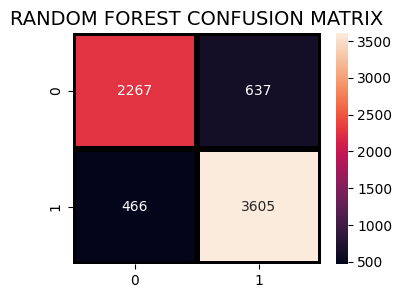

In [25]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [26]:
# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importance
print(feature_importance_df)

                                  Feature  Importance
12  Have you ever had suicidal thoughts ?    0.234363
4                       Academic Pressure    0.156459
14                       Financial Stress    0.094136
6                                    CGPA    0.087922
1                                     Age    0.084538
2                                    City    0.071844
13                       Work/Study Hours    0.067413
11                                 Degree    0.062340
7                      Study Satisfaction    0.042081
10                         Dietary Habits    0.033808
9                          Sleep Duration    0.033586
0                                  Gender    0.015798
15       Family History of Mental Illness    0.015253
3                              Profession    0.000391
8                        Job Satisfaction    0.000060
5                           Work Pressure    0.000007


<Axes: >

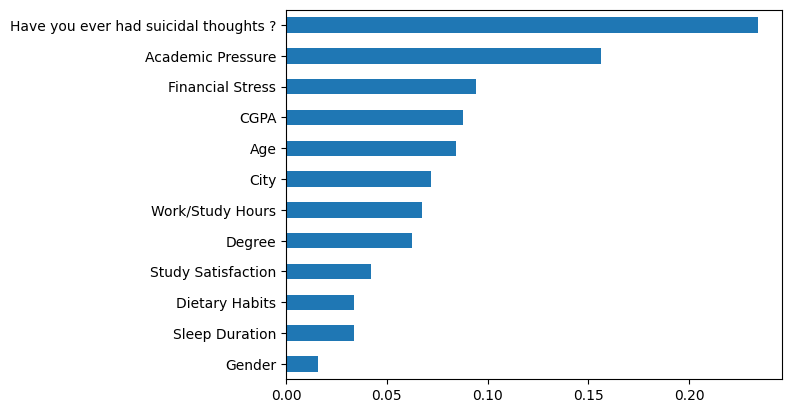

In [27]:
weights = pd.Series(feature_importance,
                 index=X.columns.values)
weights.sort_values()[-12:].plot(kind = 'barh')